In [1]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import RocCurveDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [2]:
df = pd.read_csv(r"datasets\bank_data.csv")
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df.shape

(10127, 22)

In [11]:
df.isnull().sum()

Unnamed: 0                  0
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10127.0,5.063000e+03,2.923557e+03,0.0,2.531500e+03,5.063000e+03,7.594500e+03,1.012600e+04
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03


In [5]:
cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'                
]

quant_columns = [
    'Customer_Age',
    'Dependent_count', 
    'Months_on_book',
    'Total_Relationship_Count', 
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 
    'Credit_Limit', 
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

In [12]:
cat_columns = df.select_dtypes(exclude='number').columns
category_lst = list(set(list(cat_columns)) - set(['Attrition_Flag']))

category_lst 

['Income_Category',
 'Card_Category',
 'Education_Level',
 'Gender',
 'Marital_Status']

In [13]:
def perform_eda(df):
    # Identify categorical columns
    cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
    'Attrition_Flag'
    ]

    # Create a Churn Column from Attrition_Flag
    df['Churn'] = df['Attrition_Flag'].apply(
        lambda val: 0 if val == "Existing Customer" else 1)
    
    # Visualize  distribution of the Churn Column
    plt.figure(figsize=(20,10))
    df['Churn'].hist();
    plt.savefig('images\eda\churn_histogram.png')

    # Plot histogram of Customer Age
    plt.figure(figsize=(20,10))
    df['Customer_Age'].hist();
    plt.savefig('images\eda\customer_age.png')

    # Plot histogram of normalized Marriage Status
    plt.figure(figsize=(20,10))
    df.Marital_Status.value_counts('normalize').plot(kind='bar');
    plt.savefig('images\eda\marital_status.png')

    # Plot histogram of Total_Trans_Ct
    plt.figure(figsize=(20,10))
    sns.histplot(df['Total_Trans_Ct'], stat='density', kde=True);
    plt.savefig('images\eda\Total_Trans_Ct.png')

    # Plot Correlation heatmap
    quant_columns = list(set(df.columns.tolist()) - set(cat_columns))
    plt.figure(figsize=(20,10))
    sns.heatmap(df[quant_columns].corr(), annot=False, cmap='Dark2_r', linewidths = 2);
    plt.savefig('images\eda\corr_heatmap.png')

In [21]:
type(df.columns)

pandas.core.indexes.base.Index

In [27]:
import time

Duration: 1.7594728469848633 seconds


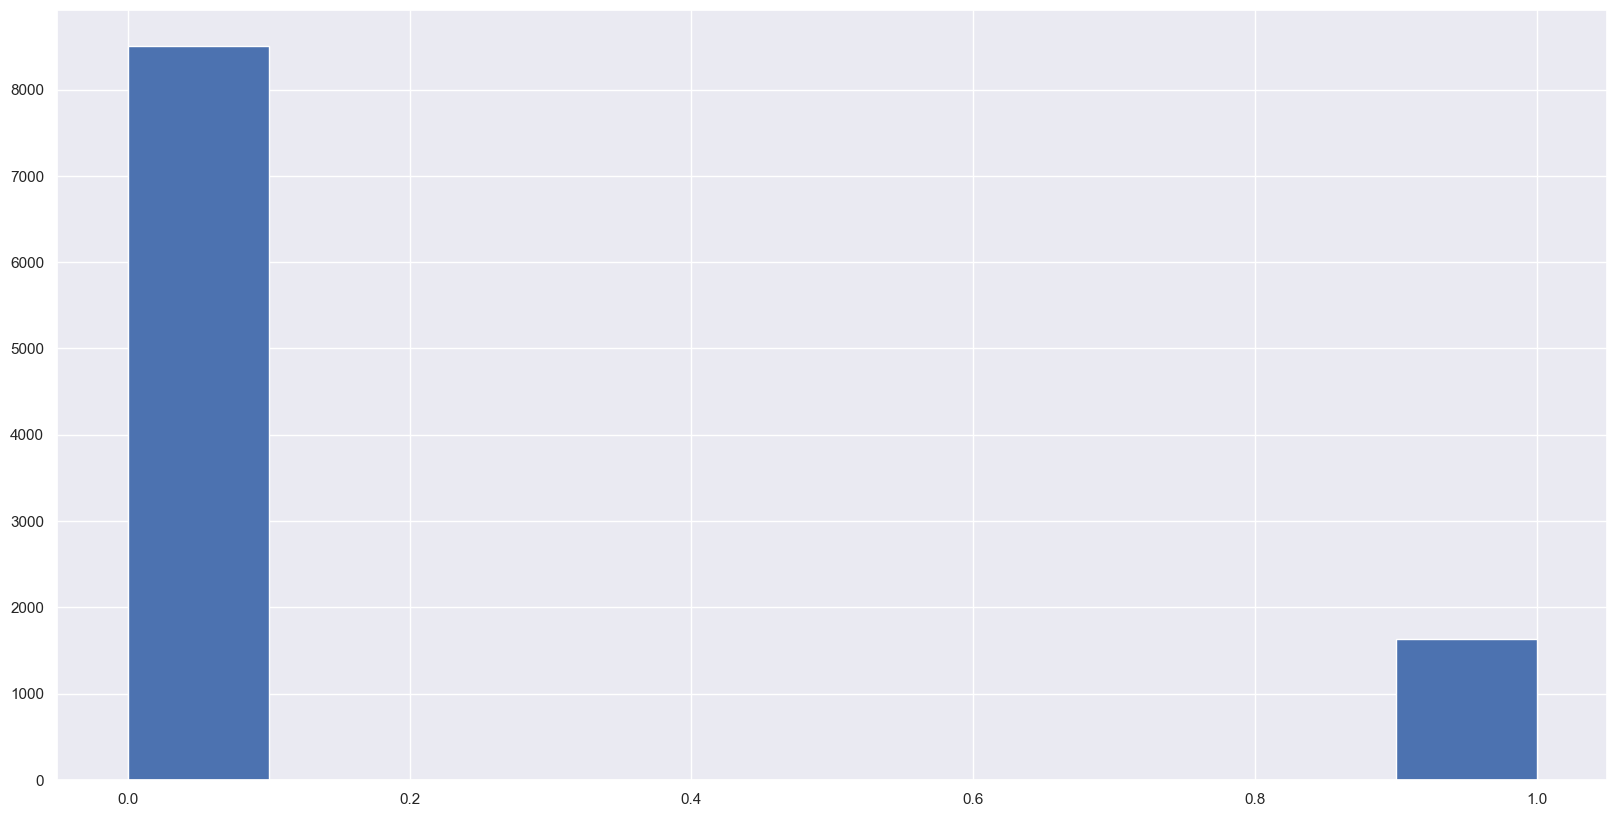

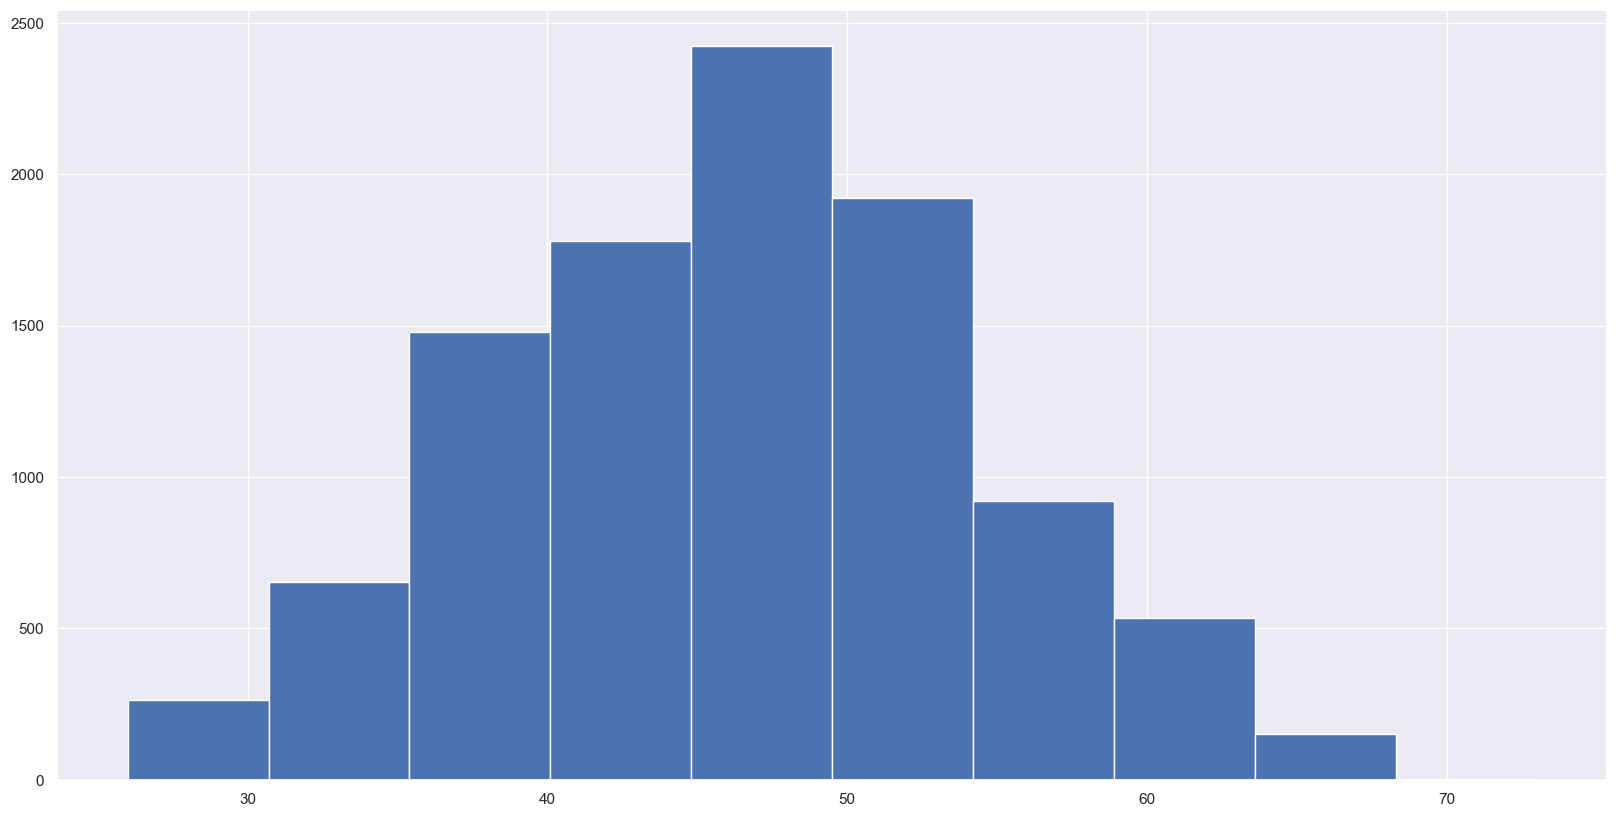

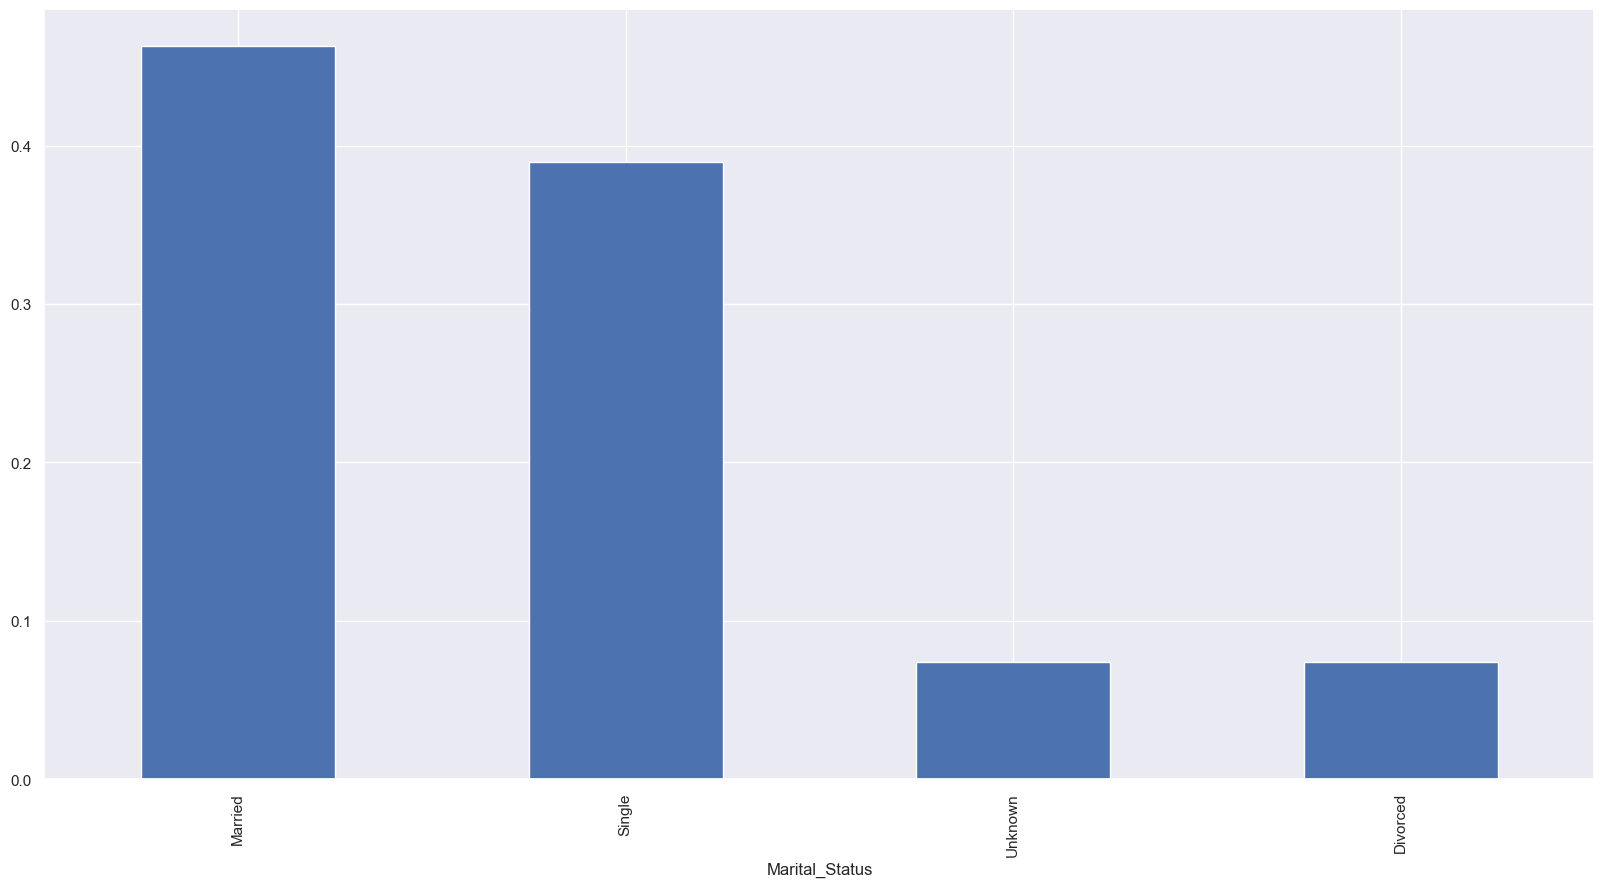

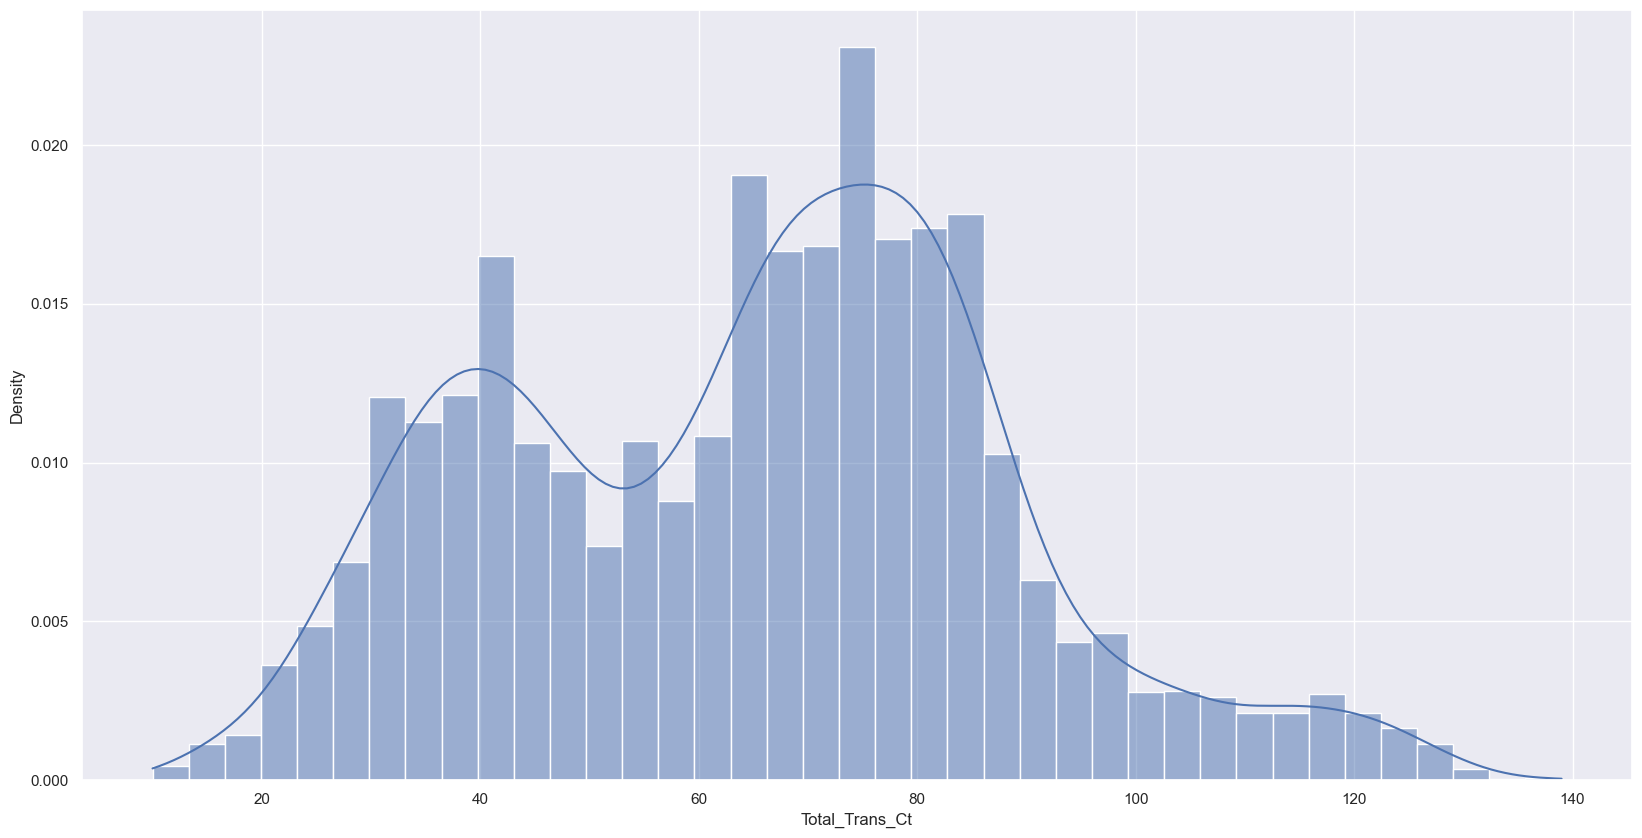

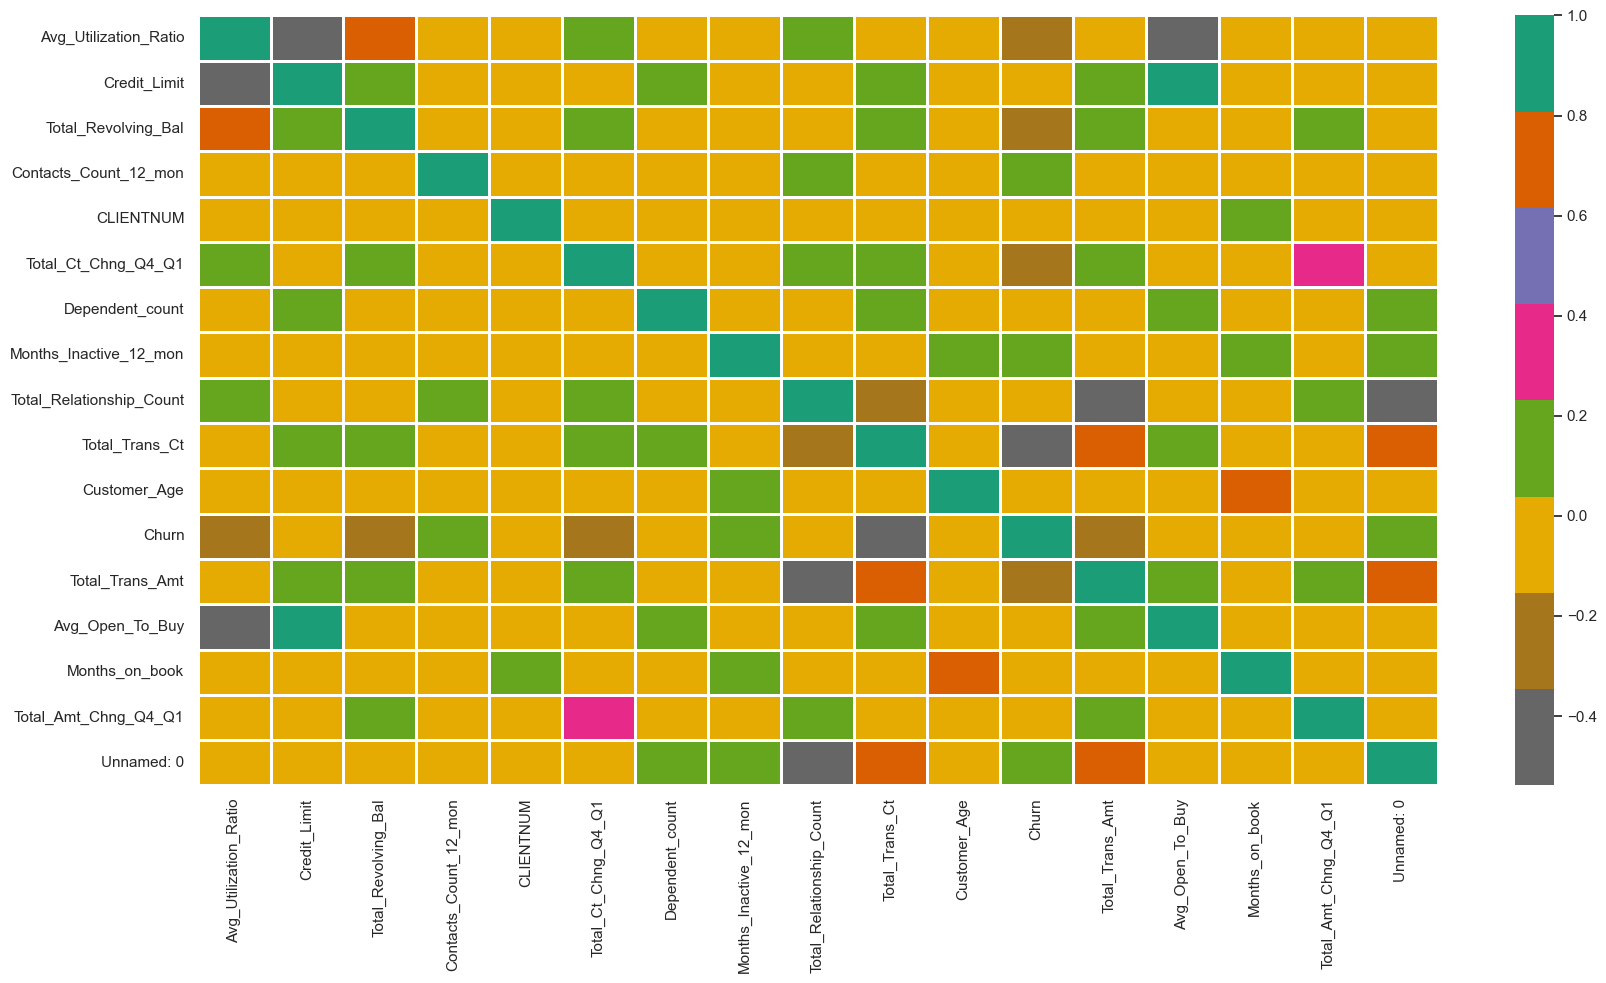

In [79]:
start_time = time.time()
perform_eda(df)
stop_time = time.time()

print(f"Duration: {stop_time - start_time} seconds")


In [3]:
df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)

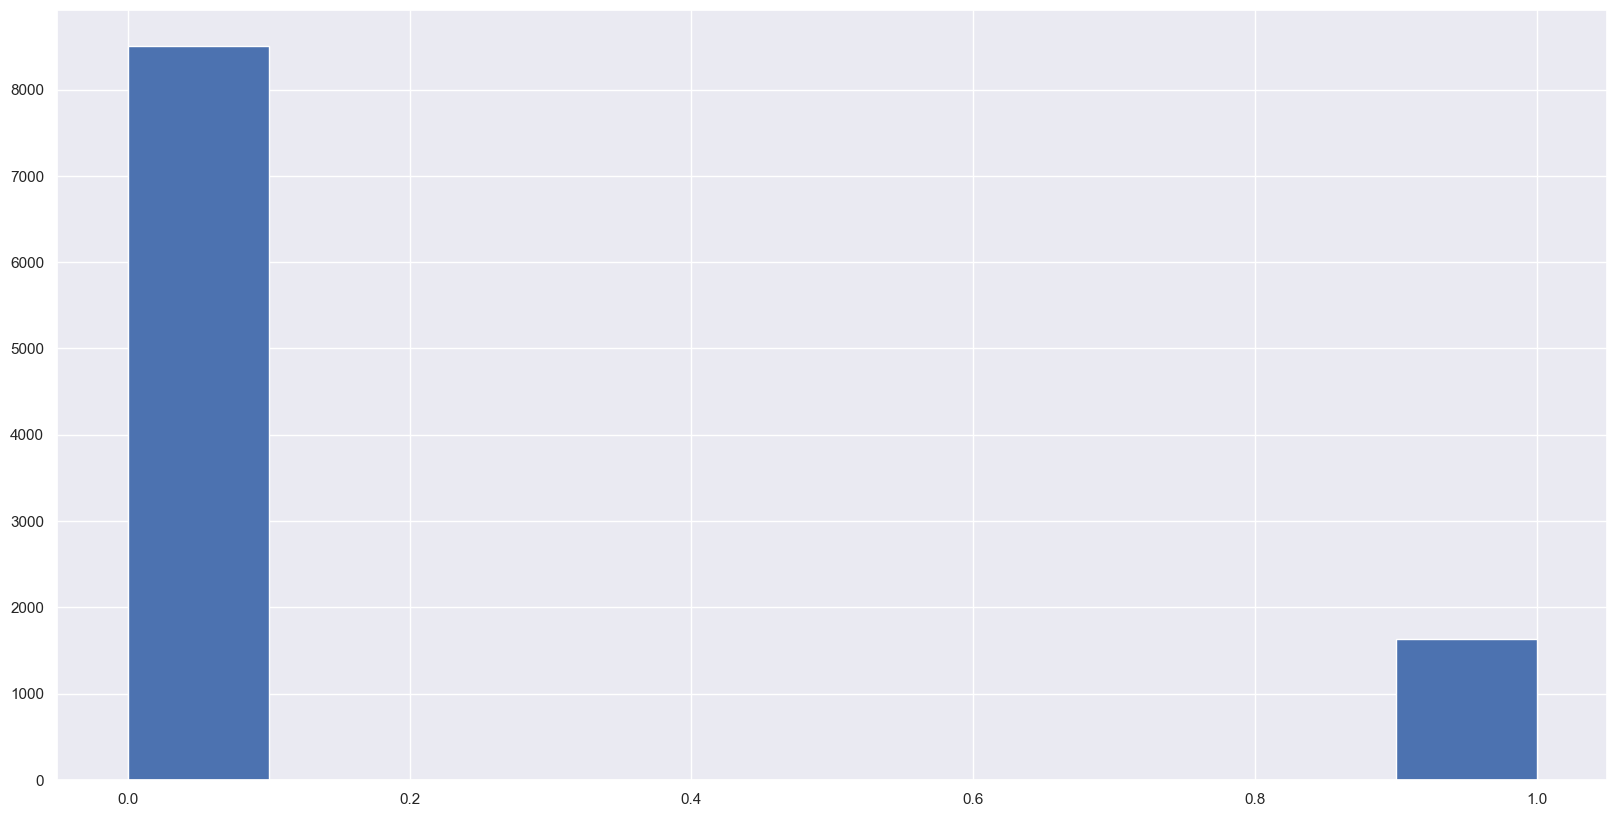

In [15]:
plt.figure(figsize=(20,10))
df['Churn'].hist();

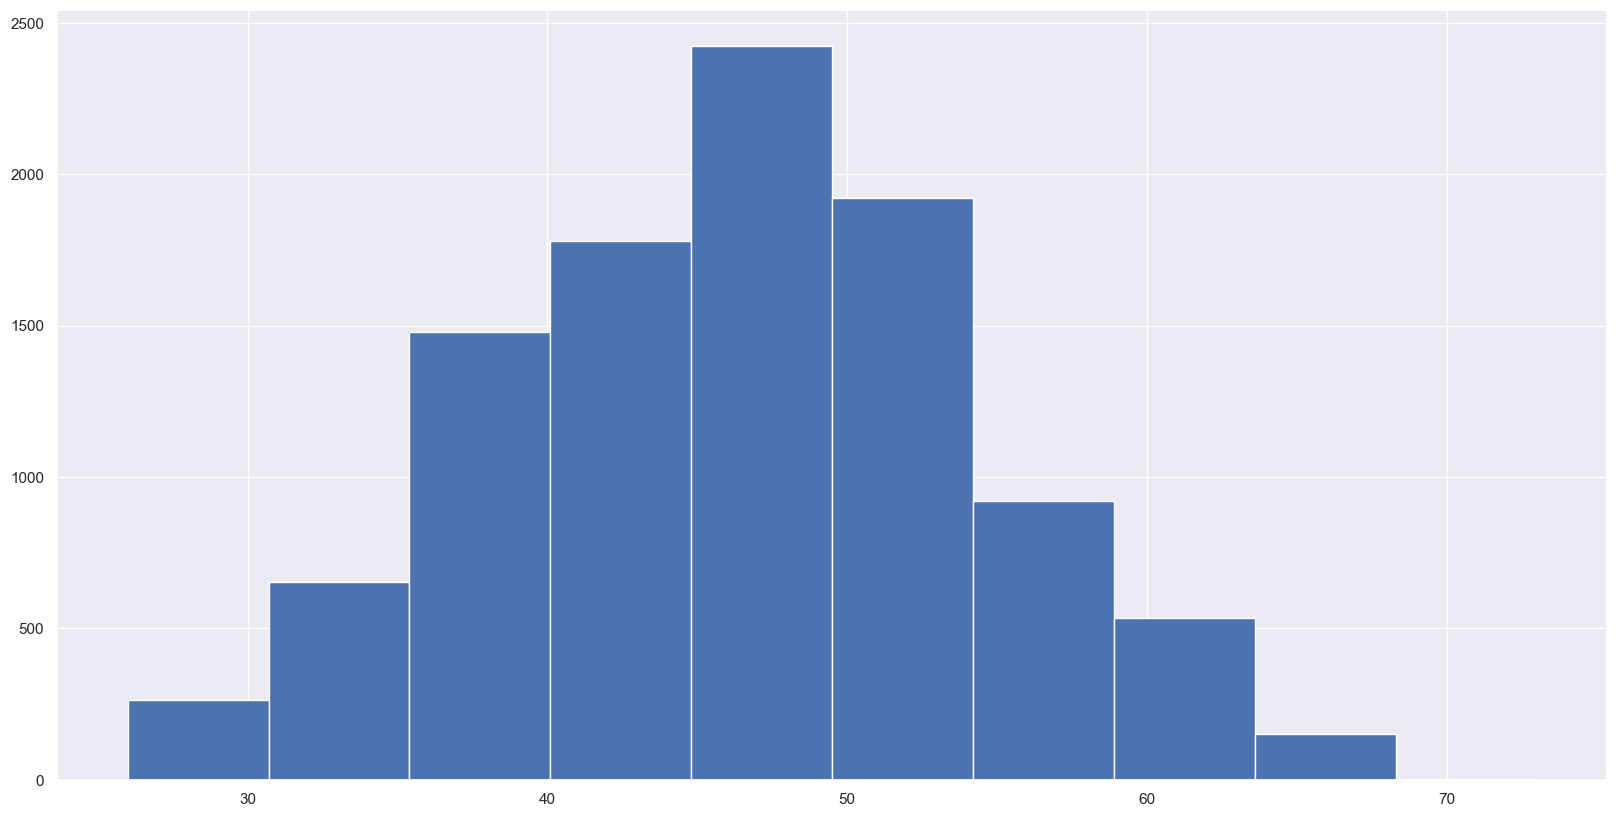

In [16]:
plt.figure(figsize=(20,10)) 
df['Customer_Age'].hist();

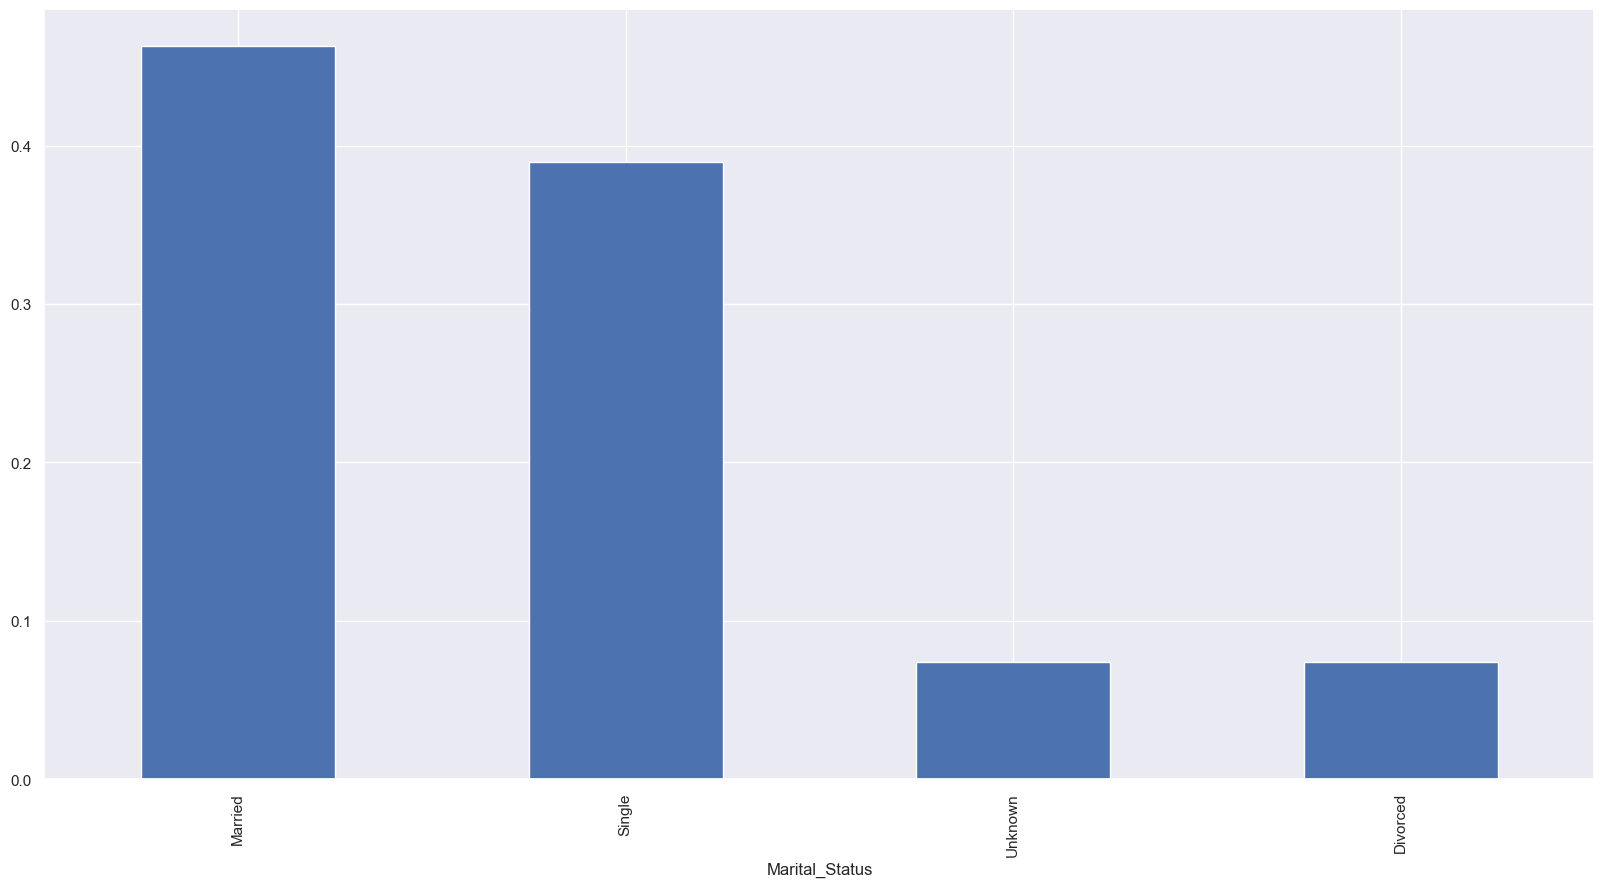

In [145]:
plt.figure(figsize=(20,10)) 
df.Marital_Status.value_counts('normalize').plot(kind='bar');

plt.savefig('images\eda\marital_status.jpg')

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


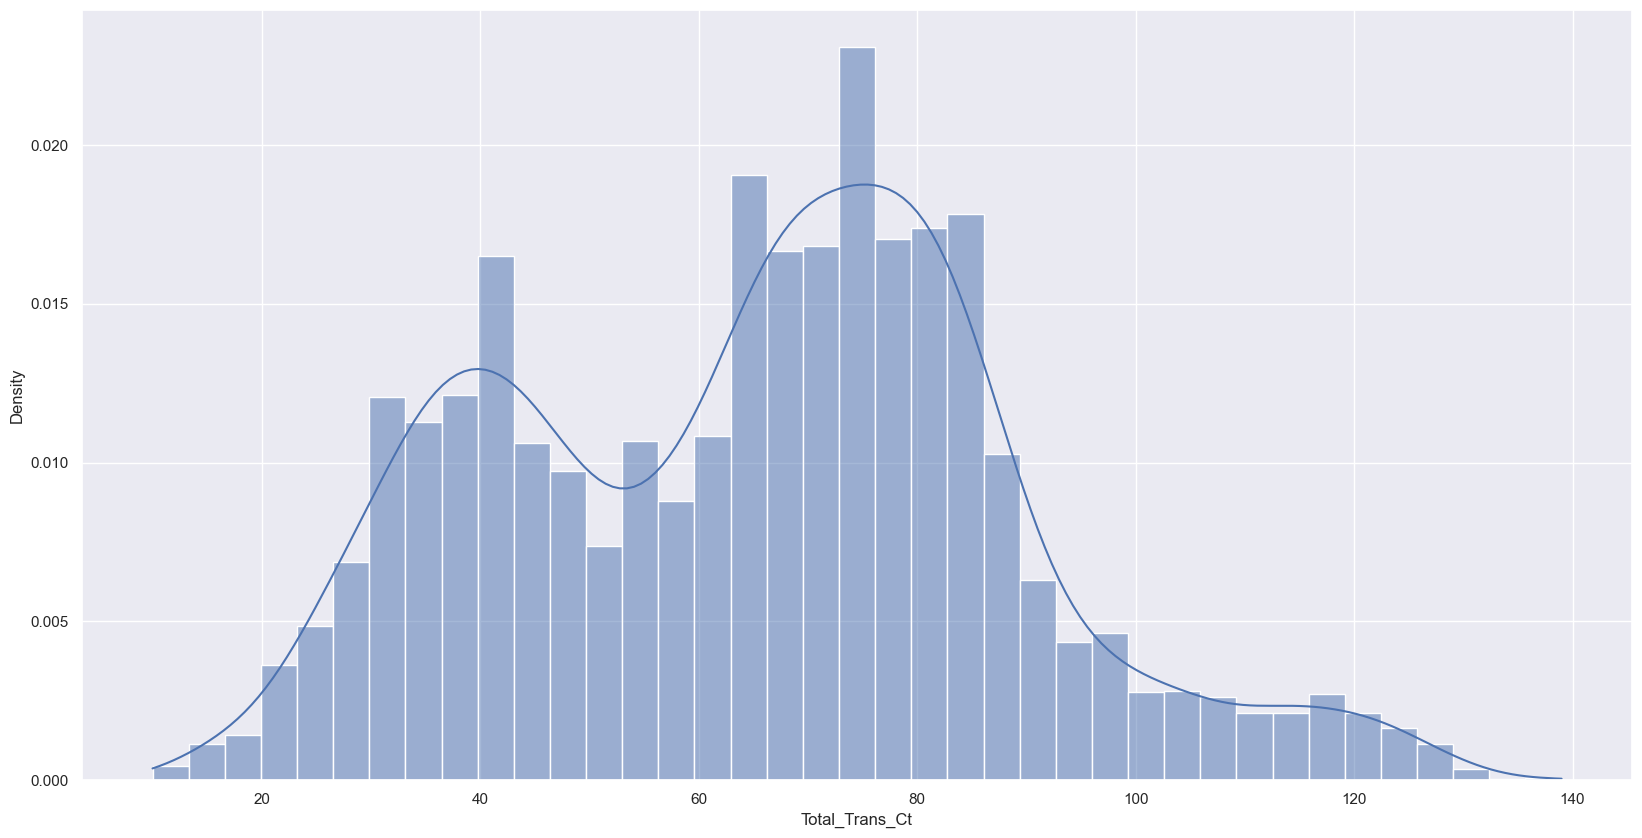

In [18]:
plt.figure(figsize=(20,10)) 
# distplot is deprecated. Use histplot instead
# sns.distplot(df['Total_Trans_Ct']);
# Show distributions of 'Total_Trans_Ct' and add a smooth curve obtained using a kernel density estimate
sns.histplot(df['Total_Trans_Ct'], stat='density', kde=True);

In [38]:
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


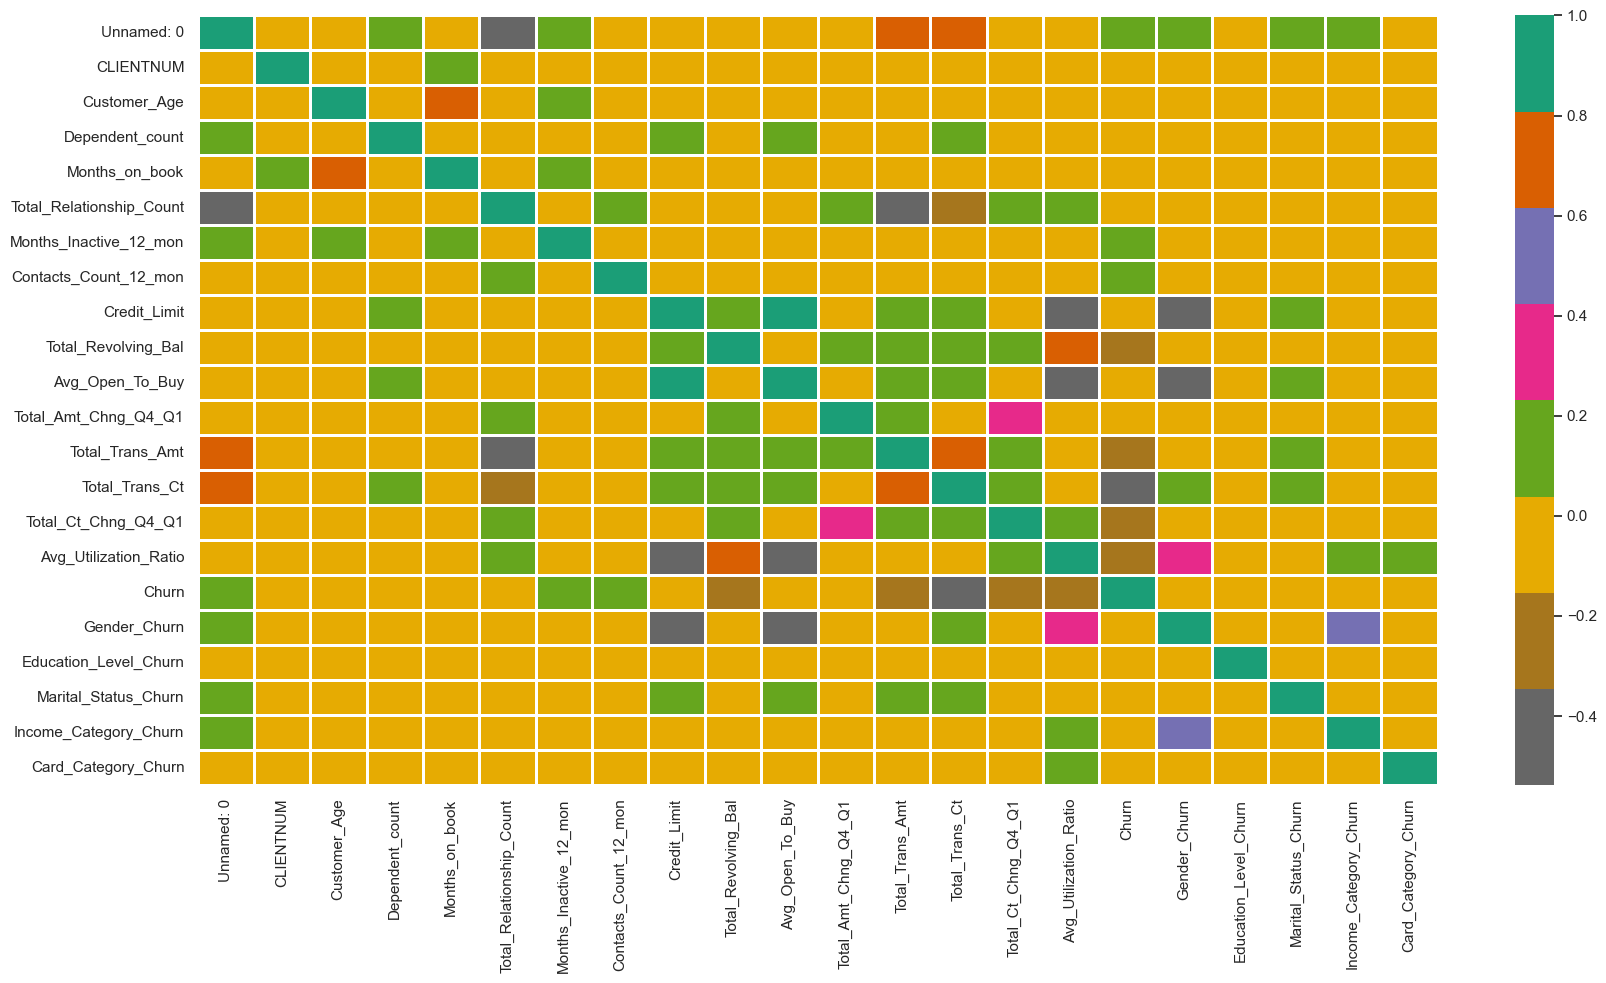

<Figure size 500x500 with 0 Axes>

In [146]:
df1 =df.copy()
df1.drop(columns=cat_columns, inplace=True)
plt.figure(figsize=(20,10)) 
sns.heatmap(df1.corr(), annot=False, cmap='Dark2_r', linewidths = 2)
plt.show()

plt.savefig('images\eda\corr_heatmap.png')

In [4]:
y = df['Churn']

In [5]:
X = pd.DataFrame()

In [47]:
df['Gender'].head()

0    M
1    F
2    M
3    F
4    M
Name: Gender, dtype: object

In [6]:
import time

In [59]:
start_time = time.time()
# gender encoded column
gender_lst = []
gender_groups = df.groupby('Gender')['Churn'].mean()

for val in df['Gender']:
    gender_lst.append(gender_groups.loc[val])

df['Gender_Churn'] = gender_lst  
df['Gender_Churn'].head()

stop_time = time.time()

print(f'duration: {stop_time - start_time}')

duration: 0.10085201263427734


In [16]:
import time
start_time = time.time()
# Assuming df is your DataFrame with 'Gender' and 'Churn' columns
df['Gender_Churn'] = df.groupby('Gender')['Churn'].transform('mean')
df['Gender_Churn'].head()

stop_time = time.time()

print(f'duration: {stop_time - start_time}')

duration: 0.022855281829833984


In [7]:
def encode_feature(df, feature):
    df[feature+ '_Churn'] = df.groupby(feature)['Churn'].transform('mean')
    return df

In [11]:
df2 = df.copy()
start_time = time.time()
df2 = encode_feature(df, 'Gender')
df2 = encode_feature(df, 'Education_Level')
df2 = encode_feature(df, 'Marital_Status')
df2 = encode_feature(df, 'Income_Category')
df2 = encode_feature(df, 'Card_Category')
stop_time = time.time()
print(f'Duration: {round(stop_time - start_time, 3)} seconds')
len(df2.columns)

Duration: 0.019 seconds


28

In [8]:
from churn_library import encoder_helper_new

In [9]:
dfa = df.copy()
cat_columns = dfa.select_dtypes(exclude='number').columns.tolist()
category_lst = list(set(cat_columns) - set(['Attrition_Flag']))
new = encoder_helper_new(dfa, category_lst)

# category_lst
# new.drop(columns=category_lst, inplace=True)
# len(new.columns)

Columns before encoding: Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn'],
      dtype='object') 23
Columns before drop: Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_C

In [27]:
new.columns

Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn', 'Gender_Churn', 'Education_Level_Churn',
       'Marital_Status_Churn', 'Income_Category_Churn', 'Card_Category_Churn'],
      dtype='object')

In [ ]:
df3 = df.copy()
start_time = time.time()
for i in ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']:
    df3 = encode_feature(df, i)
stop_time = time.time()
print(f'Duration: {stop_time - start_time}')
df3.head()

In [75]:
df3 = df.copy()
start_time = time.time()
for i in ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']:
    df3 = encode_feature(df, i)
stop_time = time.time()
print(f'Duration: {stop_time - start_time}')
df3.head()

Duration: 0.009999752044677734


,Unnamed: 0,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1144,42,1.625,0.061,0,0.146152,0.152012,0.151269,0.134807,0.160979
1,1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1291,33,3.714,0.105,0,0.173572,0.155691,0.169414,0.171862,0.160979
2,2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1887,20,2.333,0.000,0,0.146152,0.155691,0.151269,0.157655,0.160979
3,3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1171,20,2.333,0.760,0,0.173572,0.152012,0.172230,0.171862,0.160979
4,4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,816,28,2.500,0.000,0,0.146152,0.159381,0.151269,0.134807,0.160979


In [62]:
def encoder_helper(df, category_lst, response='Churn'):
    for i in category_lst:
        df[i + '_' + response] = df.groupby(i)['Churn'].transform('mean')
    df.drop(columns=category_lst, inplace=True)
    return df

In [35]:
col = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [57]:
df.columns

Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn', 'Gender_Churn', 'Education_Level_Churn',
       'Marital_Status_Churn', 'Income_Category_Churn', 'Card_Category_Churn'],
      dtype='object')

In [55]:
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [92]:
# df1 = df.copy()
df = encoder_helper(df, col, 'Churn')
len(df.columns)

23

In [76]:
def encode_feature(df, feature):
    df[feature+ '_Churn'] = df.groupby(feature)['Churn'].transform('mean')
    return df

def encoder_helper(df, category_lst, response):
    for i in category_lst:
        df[i + '_' + response] = df.groupby(i)['Churn'].transform('mean')
    return df

col = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

print(f'Duration: {stop_time - start_time}')
df3.head()

Duration: 0.01633429527282715


,Unnamed: 0,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1144,42,1.625,0.061,0,0.146152,0.152012,0.151269,0.134807,0.160979
1,1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1291,33,3.714,0.105,0,0.173572,0.155691,0.169414,0.171862,0.160979
2,2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1887,20,2.333,0.000,0,0.146152,0.155691,0.151269,0.157655,0.160979
3,3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1171,20,2.333,0.760,0,0.173572,0.152012,0.172230,0.171862,0.160979
4,4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,816,28,2.500,0.000,0,0.146152,0.159381,0.151269,0.134807,0.160979


In [ ]:
# gender encoded column
gender_lst = []
gender_groups = df.groupby('Gender').mean()['Churn']

for val in df['Gender']:
    gender_lst.append(gender_groups.loc[val])

df['Gender_Churn'] = gender_lst  
  
#education encoded column
edu_lst = []
edu_groups = df.groupby('Education_Level').mean()['Churn']

for val in df['Education_Level']:
    edu_lst.append(edu_groups.loc[val])

df['Education_Level_Churn'] = edu_lst

#marital encoded column
marital_lst = []
marital_groups = df.groupby('Marital_Status').mean()['Churn']

for val in df['Marital_Status']:
    marital_lst.append(marital_groups.loc[val])

df['Marital_Status_Churn'] = marital_lst

#income encoded column
income_lst = []
income_groups = df.groupby('Income_Category').mean()['Churn']

for val in df['Income_Category']:
    income_lst.append(income_groups.loc[val])

df['Income_Category_Churn'] = income_lst

#card encoded column
card_lst = []
card_groups = df.groupby('Card_Category').mean()['Churn']
 
for val in df['Card_Category']:
    card_lst.append(card_groups.loc[val])

df['Card_Category_Churn'] = card_lst
    
    

In [12]:
keep_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
             'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
             'Gender_Churn', 'Education_Level_Churn', 'Marital_Status_Churn', 
             'Income_Category_Churn', 'Card_Category_Churn']

X = df2[keep_cols]

In [68]:
set(new_df.columns.tolist()) - set(keep_cols)

{'Attrition_Flag', 'CLIENTNUM', 'Churn', 'Unnamed: 0'}

In [66]:
len(keep_cols)

19

In [13]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.146152,0.152012,0.151269,0.134807,0.160979
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.173572,0.155691,0.169414,0.171862,0.160979
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.146152,0.155691,0.151269,0.157655,0.160979
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.173572,0.152012,0.172230,0.171862,0.160979
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.146152,0.159381,0.151269,0.134807,0.160979


In [14]:
def perform_feature_engineering(df, response='Churn'):
    y = df[response]
    X = df.drop(columns=['Attrition_Flag', 'CLIENTNUM', 'Churn', 'Unnamed: 0'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
    return X_train, X_test, y_train, y_test


In [16]:
X_data = perform_feature_engineering(df)
type(X_data)

tuple

In [18]:
X_train, X_test, y_train, y_test = perform_feature_engineering(df)

In [23]:
round(X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]), 1)

0.3

In [81]:
new_df.drop(columns=['Attrition_Flag', 'CLIENTNUM', 'Churn', 'Unnamed: 0'], axis=1)

In [82]:
new_df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.146152,0.152012,0.151269,0.134807,0.160979
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.173572,0.155691,0.169414,0.171862,0.160979
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.146152,0.155691,0.151269,0.157655,0.160979
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.173572,0.152012,0.172230,0.171862,0.160979
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.146152,0.159381,0.151269,0.134807,0.160979


In [ ]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [123]:
# This cell may take up to 15-20 minutes to run
start_time = time.time()
# grid search
rfc = RandomForestClassifier(random_state=42)
# Use a different solver if the default 'lbfgs' fails to converge
# Reference: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lrc = LogisticRegression(solver='lbfgs', max_iter=3000)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['log2', 'sqrt'],
    'max_depth' : [4,5,100],
    'criterion' :['gini', 'entropy']
}

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
cv_rfc.fit(X_train, y_train)

lrc.fit(X_train, y_train)

y_train_preds_rf = cv_rfc.best_estimator_.predict(X_train)
y_test_preds_rf = cv_rfc.best_estimator_.predict(X_test)

y_train_preds_lr = lrc.predict(X_train)
y_test_preds_lr = lrc.predict(X_test)

stop_time = time.time()
print(f"Duration: {stop_time - start_time} ")

# scores
print('random forest results')
print('test results')
print(classification_report(y_test, y_test_preds_rf))
print('train results')
print(classification_report(y_train, y_train_preds_rf))

print('logistic regression results')
print('test results')
print(classification_report(y_test, y_test_preds_lr))
print('train results')
print(classification_report(y_train, y_train_preds_lr))

Duration: 862.7211604118347 
random forest results
test results
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2543
           1       0.93      0.80      0.86       496

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

train results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5957
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

logistic regression results
test results
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2543
           1       0.71      0.45      0.55       496

    accuracy                           0.88      3039
   macro 

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)

# y_train = np.array(X_train)
# y_test = np.array(X_test)

In [112]:
def train_models(X_train, X_test, y_train, y_test):

    # Initialize models
    rfc = RandomForestClassifier(random_state=42)
    lrc = LogisticRegression(solver='lbfgs', max_iter=3000, n_jobs=12)

    # Set up hyperparameters for grid search
    param_grid = { 
        'n_estimators': [200, 500],
        'max_features': ['log2', 'sqrt'],
        'max_depth' : [4,5,100],
        'criterion' :['gini', 'entropy']
    }

    # Fit model and Grid search
    cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=12)
    cv_rfc.fit(X_train, y_train)
    lrc.fit(X_train, y_train)

    # Plot ROC curve for Logistic Regression model
    lrc_plot = RocCurveDisplay.from_estimator(lrc, X_test, y_test)
    plt.savefig(r'images\results\lr_model_ROC.png')
    plt.close()

    # Plot ROC curve for both Logistic Regression and Random Forest
    plt.figure(figsize=(15, 8))
    ax = plt.gca()
    rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
    lrc_plot.plot(ax=ax, alpha=0.8)
    plt.savefig(r'images\results\rf_model_ROC.png')
    plt.close()

    # save best models
    joblib.dump(cv_rfc.best_estimator_, './models/rfc_model.pkl')
    joblib.dump(lrc, './models/logistic_model.pkl')

In [99]:
train_models(X_train, X_test, y_train, y_test)

In [134]:
# This cell may take up to 15-20 minutes to run
start_time = time.time()
# grid search
rfc = RandomForestClassifier(random_state=42)
# Use a different solver if the default 'lbfgs' fails to converge
# Reference: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lrc = LogisticRegression(solver='lbfgs', max_iter=3000, n_jobs=12)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['log2', 'sqrt'],
    'max_depth' : [4,5,100],
    'criterion' :['gini', 'entropy']
}

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=12)
cv_rfc.fit(X_train, y_train)

lrc.fit(X_train, y_train)

y_train_preds_rf = cv_rfc.best_estimator_.predict(X_train)
y_test_preds_rf = cv_rfc.best_estimator_.predict(X_test)

y_train_preds_lr = lrc.predict(X_train)
y_test_preds_lr = lrc.predict(X_test)
stop_time = time.time()
print(f"Duration: {stop_time - start_time} seconds")
# scores
print('random forest results')
print('test results')
print(classification_report(y_test, y_test_preds_rf))
print('train results')
print(classification_report(y_train, y_train_preds_rf))

print('logistic regression results')
print('test results')
print(classification_report(y_test, y_test_preds_lr))
print('train results')
print(classification_report(y_train, y_train_preds_lr))

Duration: 191.86577224731445 seconds
random forest results
test results
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2543
           1       0.93      0.80      0.86       496

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

train results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5957
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

logistic regression results
test results
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2543
           1       0.72      0.44      0.54       496

    accuracy                           0.88      3039
 

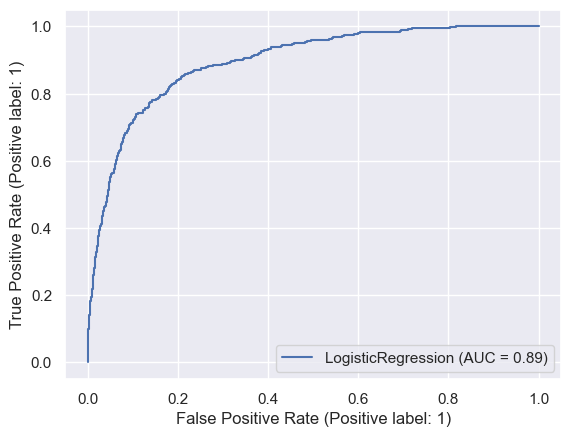

In [81]:
lrc_plot = RocCurveDisplay.from_estimator(lrc, X_test, y_test)

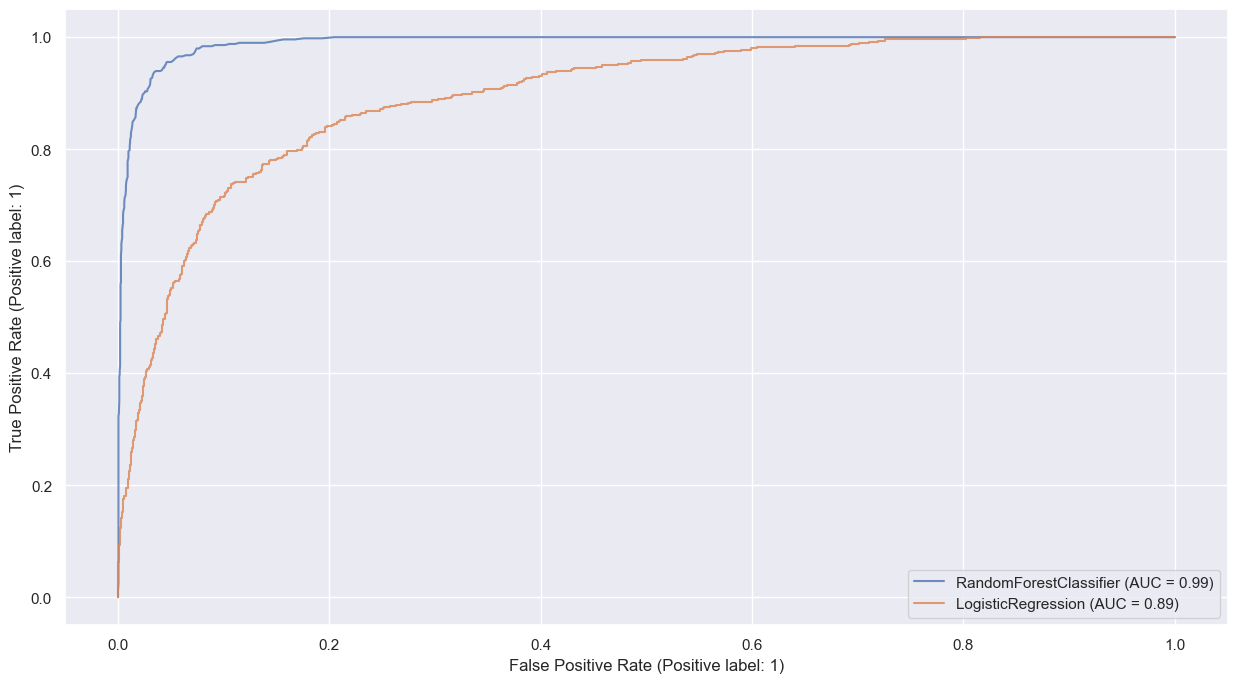

In [82]:
# plots
plt.figure(figsize=(15, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(cv_rfc.best_estimator_, X_test, y_test, ax=ax, alpha=0.8)
lrc_plot.plot(ax=ax, alpha=0.8)
plt.show()

In [135]:
# save best model
joblib.dump(cv_rfc.best_estimator_, './models/rfc_model.pkl')
joblib.dump(lrc, './models/logistic_model.pkl')

['./models/logistic_model.pkl']

In [136]:
rfc_model = joblib.load('./models/rfc_model.pkl')
lr_model = joblib.load('./models/logistic_model.pkl')

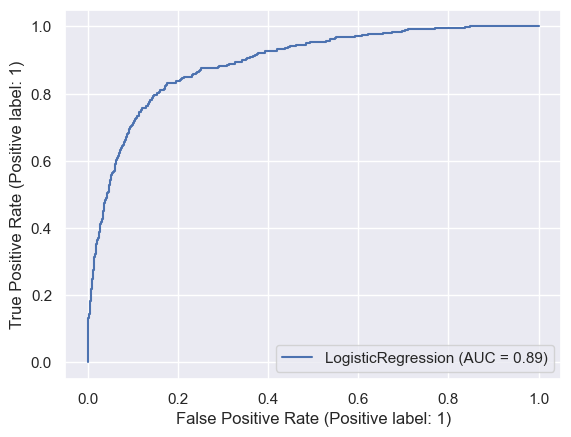

In [137]:
lrc_plot = RocCurveDisplay.from_estimator(lr_model, X_test, y_test)

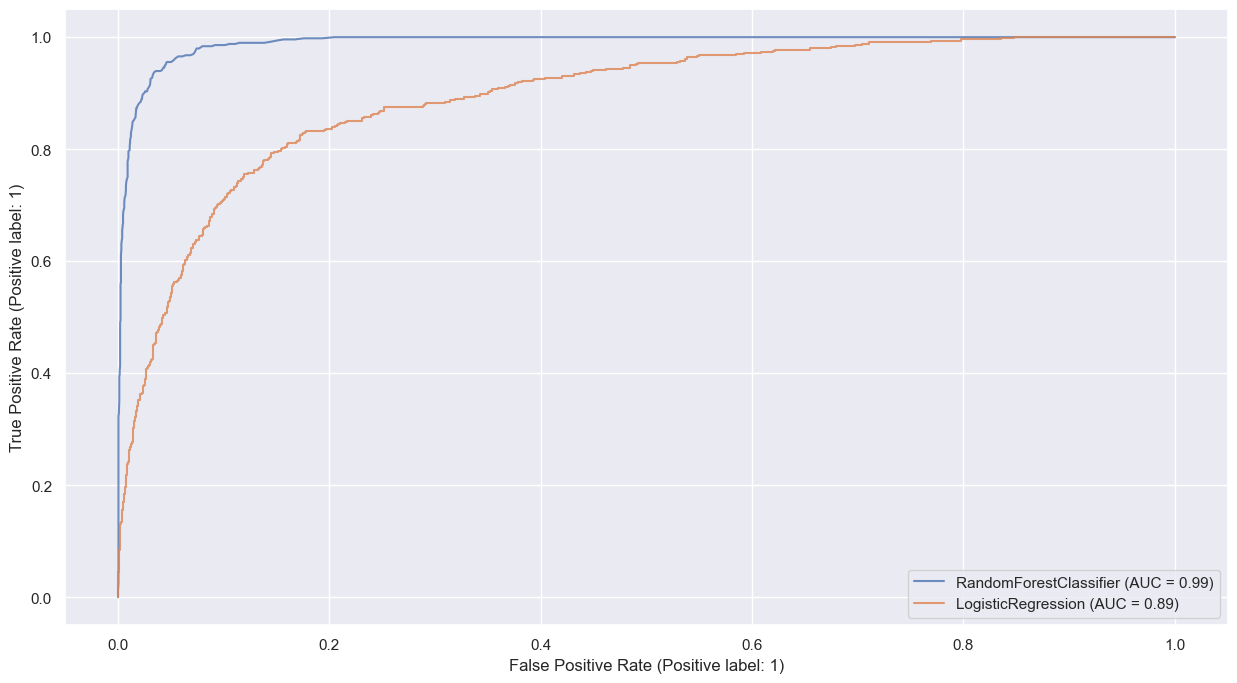

In [138]:
plt.figure(figsize=(15, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test, ax=ax, alpha=0.8)
lrc_plot.plot(ax=ax, alpha=0.8)
plt.show()

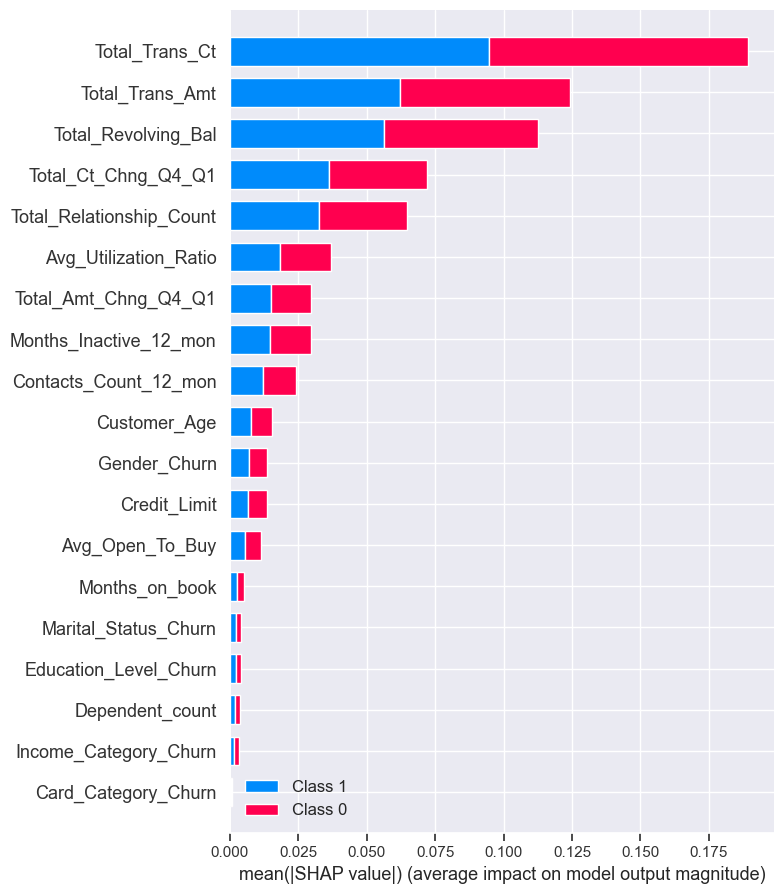

In [139]:
explainer = shap.TreeExplainer(cv_rfc.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

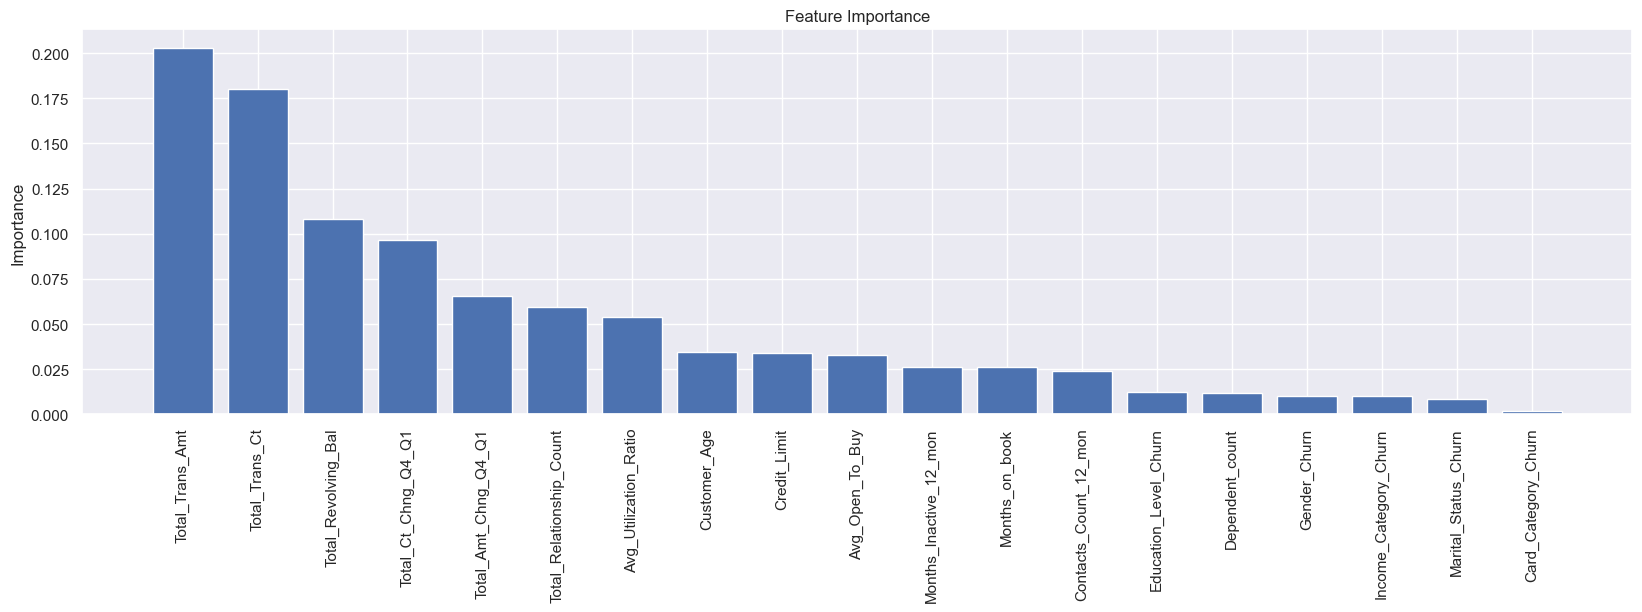

In [140]:
# Calculate feature importances
importances = cv_rfc.best_estimator_.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,5))

# Create plot title
plt.title("Feature Importance")
plt.ylabel('Importance')

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90);

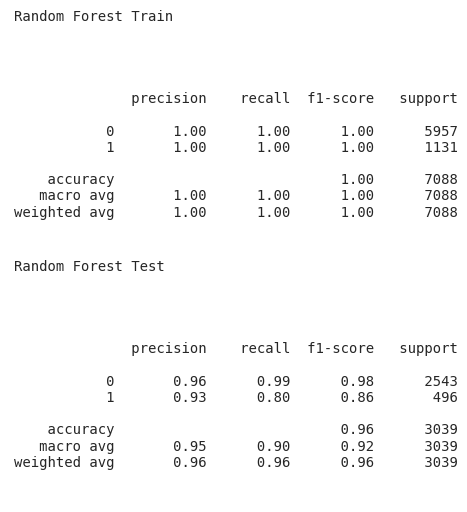

In [141]:
plt.rc('figure', figsize=(5, 5))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 1.25, str('Random Forest Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.05, str(classification_report(y_test, y_test_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.text(0.01, 0.6, str('Random Forest Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.7, str(classification_report(y_train, y_train_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off');


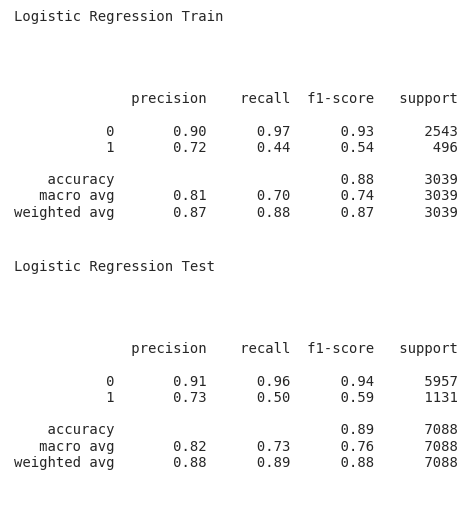

In [149]:
plt.rc('figure', figsize=(5, 5))
plt.text(0.01, 1.25, str('Logistic Regression Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.05, str(classification_report(y_train, y_train_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.text(0.01, 0.6, str('Logistic Regression Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.7, str(classification_report(y_test, y_test_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off');

plt.savefig(r'images\results\lrmodeloutput.png')

In [146]:
from sklearn.metrics import classification_report

In [152]:
def plot_classification_results(model_name, train_preds, test_preds, y_train, y_test, output_path):
    plt.rc('figure', figsize=(6, 7))
    
    plt.text(0.01, 1.25, f'{model_name} Train',{'fontsize': 10}, fontproperties='monospace')
    plt.text(0.01, 0.05, str(classification_report(y_test, test_preds)), {'fontsize': 10}, fontproperties='monospace')
    plt.text(0.01, 0.6, f'{model_name} Test', {'fontsize': 10}, fontproperties='monospace')
    plt.text(0.01, 0.7, str(classification_report(y_train, train_preds)), {'fontsize': 10}, fontproperties='monospace')
    
    plt.axis('off')
    plt.savefig(output_path)
    plt.close()

In [153]:
def classification_report_image(y_train,
                                y_test,
                                y_train_preds_lr,
                                y_train_preds_rf,
                                y_test_preds_lr,
                                y_test_preds_rf):
    # plot random forest model results and save
    plot_classification_results('Random Forest', y_train_preds_rf, y_test_preds_rf,
                        y_train, y_test, 'images/results/rfmodeloutput.png')

    # plot logistic regression model results and save
    plot_classification_results('Logistic Regression', y_train_preds_lr, y_test_preds_lr,
                        y_train, y_test, 'images/results/lrmodeloutput.png')


In [154]:
def generate_predictions(X_train, X_test, model_name):

    model = joblib.load(f'./models/{model_name}.pkl')
    # Predict with the best model
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)

    return y_train_preds, y_test_preds
    

In [124]:
y_train_preds_rf, y_test_preds_rf = generate_predictions(X_train, X_test, 'rfc_model')
y_train_preds_lr, y_test_preds_lr = generate_predictions(X_train, X_test, 'logistic_model')

In [155]:
classification_report_image(y_train,
                                y_test,
                                y_train_preds_lr,
                                y_train_preds_rf,
                                y_test_preds_lr,
                                y_test_preds_rf)

In [107]:
def feature_importance_plot(model, X_data, output_pth='images/results'):
    model_select = joblib.load(f'./models/{model}.pkl')
    
    # Calculate feature importances
    importances = model_select.feature_importances_
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    # Rearrange feature names so they match the sorted feature importances
    names = [X_data.columns[i] for i in indices]
    # Create plot
    plt.figure(figsize=(20,5))
    # Create plot title
    plt.title("Feature Importance")
    plt.ylabel('Importance')
    # Add bars
    plt.bar(range(X_data.shape[1]), importances[indices])
    # Add feature names as x-axis labels
    plt.xticks(range(X_data.shape[1]), names, rotation=90);
    plt.savefig(output_pth + '/feature_importances.png')
    plt.close()

In [108]:
feature_importance_plot('rfc_model', X_train)

In [3]:
import numpy as np
import pandas as pd
if not isinstance(2, (np.ndarray, pd.DataFrame)):
    print(
        "generate_prediction Function ERROR: Invalid input types. "
        "x_train must be a pandas dataframe or a numpy array"
    )

generate_prediction Function ERROR: Invalid input types. x_train must be a pandas dataframe or a numpy array
